## Exploratory Data Analysis
#### Let's say we've got a new dataset about books. Is this good data? What questions can it answer for us? It's only after we understand what our data contains that we can think about how the data might be useful to us. Exploratory Data Analysis, or EDA for short, is the process of cleaning and reviewing data to derive insights such as descriptive statistics and correlation and generate hypotheses for experiments. EDA results often inform the next steps for the dataset, whether that be generating hypotheses, preparing the data for use in a machine learning model, or even throwing the data out and gathering new data!

## A first look with .head()                                     
#### Let's begin by importing a dataset and reviewing some useful pandas methods for initial exploration! We'll import the books data from a csv file using pd.read_csv and save it as a DataFrame called "books". Taking a look at the top of the DataFrame using the head function, we can see that our data contains columns representing book names, authors, ratings, publishing years, and genres.

In [1]:
# importing liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
books = pd.read_csv(r"C:\Users\NEW USER\anaconda_projects\clean_books.csv")
books.head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens


## Gathering more .info()                                       
#### pandas also offers a quick way to summarize the number of missing values in each column, the data type of each column, and memory usage using the .info method. It looks like there are no missing values in our dataset, but it does have a variety of data types.

In [3]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


## A closer look at categorical columns                               
#### A common question about categorical columns in a dataset is how many data points we have in each category. For example, perhaps we're interested in the genres represented in our books data. We can select the genre column and use the pandas Series method .value_counts to find the number of books with each genre.

In [4]:
books.value_counts("genre")

genre
Non Fiction    179
Fiction        131
Childrens       40
Name: count, dtype: int64

## .describe() numerical columns
#### Gaining a quick understanding of data included in numerical columns is done with the help of the DataFrame.describe method. Calling .describe on books, we see that it returns the count, mean, and standard deviation of the values in each numerical column (in this case rating and year), along with the min, max, and quartile values.

In [5]:
books.describe()

,rating,year
count,350.000000,350.000000
mean,4.608571,2013.508571
std,0.226941,3.284711
min,3.300000,2009.000000
25%,4.500000,2010.000000
50%,4.600000,2013.000000
75%,4.800000,2016.000000
max,4.900000,2019.000000


## Visualizing numerical data
#### Histograms are a classic way to look at the distribution of numerical data by splitting numerical values into discrete bins and visualizing the count of values in each bin. Throughout this course, we'll use Seaborn to explore datasets visually. Seaborn is imported as s-n-s. We'll also import matplotlib.pyplot aliased as plt. To create a histogram, we'll use sns.histplot and pass the books DataFrame as the data argument. Next, we indicate which column we'd like to use as x by passing the column name rating to the x keyword argument. After running plt.show to display the plot, we see that most books received ratings above 4.4, with very few getting ratings below 4.0. However, the bin size here is a little awkward. Ideally, we would have a bin for each tenth of a rating, such as a single bin for scores greater than 4.5 to 4.6 inclusive.

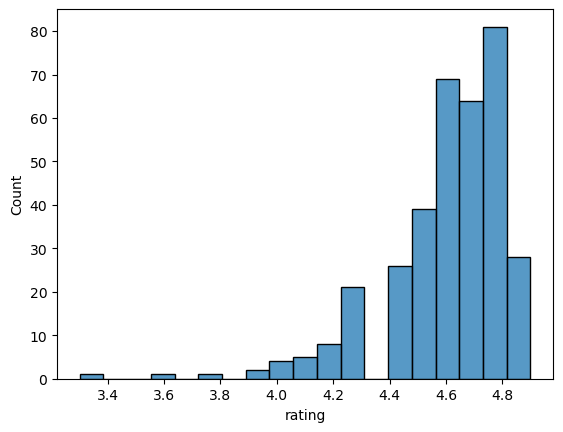

In [6]:
sns.histplot(data = books, x= "rating")
plt.show()

## Adjusting bin width
#### We can set a bin width of 0.1 using the binwidth keyword argument. That's better!

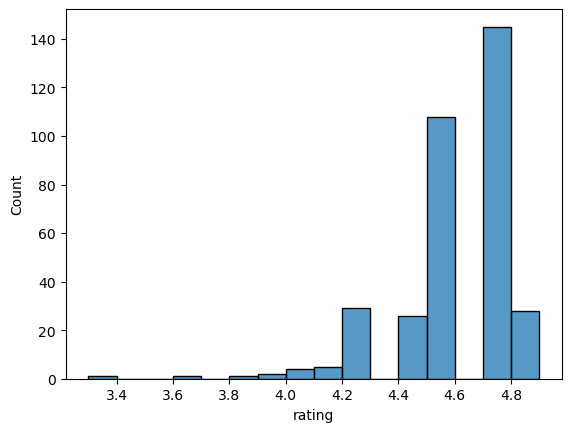

In [7]:
sns.histplot(data = books, x= "rating", binwidth = .1)
plt.show()

## Data validation
#### Data validation is an important early step in EDA. We want to understand whether data types and ranges are as expected before we progress too far in our analysis! Let's dive in.

In [8]:
books.info()
books.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


name       object
author     object
rating    float64
year        int64
genre      object
dtype: object

## Validating data types
#### We learned in the last lesson that dot-info gives a quick overview of data types included in a dataset along with other information such as the number of non-missing values. We can also use the DataFrame dot-dtypes attribute if we're only interested in data types. But what if we aren't happy with these data types? Here, the year column in the books DataFrame is stored as a float, which doesn't make sense for year data, which should always be a whole number.

In [9]:
books["year"]=books["year"].astype(int)
books.dtypes

name       object
author     object
rating    float64
year        int32
genre      object
dtype: object

## Validating categorical data
#### We can validate categorical data by comparing values in a column to a list of expected values using dot-isin, which can either be applied to a Series as we'll show here or to an entire DataFrame. Let's check whether the values in the genre column are limited to "Fiction" and "Non Fiction" by passing these genres as a list of strings to dot-isin. The function returns a Series of the same size and shape as the original but with True and False in place of all values, depending on whether the value from the original Series was included in the list passed to dot-isin. We can see that some values are False.

In [10]:
books["genre"].isin(["Fiction", "Non Fiction"])

0       True
1       True
2       True
3       True
4      False
       ...  
345     True
346     True
347     True
348     True
349    False
Name: genre, Length: 350, dtype: bool

## Validating categorical data
#### We can also use the tilde operator at the beginning of the code block to invert the True/ False values so that the function returns True if the value is NOT in the list passed to dot-isin.

In [11]:
~books["genre"].isin(["Fiction", "Non Fiction"])

0      False
1      False
2      False
3      False
4       True
       ...  
345    False
346    False
347    False
348    False
349     True
Name: genre, Length: 350, dtype: bool

## Validating categorical data
#### And if we're interested in filtering the DataFrame for only values that are in our list, we can use the isin code we just wrote to filter using Boolean indexing!

In [12]:
books[books["genre"].isin(["Fiction", "Non Fiction"])].head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,2011,Fiction


## Validating numerical data
#### Let's now validate numerical data. We can select and view only the numerical columns in a DataFrame by calling the select_dtypes method and passing "number" as the argument.

In [13]:
books.select_dtypes("number").head()

,rating,year
0,4.7,2016
1,4.6,2011
2,4.7,2018
3,4.7,2017
4,4.8,2019


## Validating numerical data
#### Perhaps we'd like to know the range of years in which the books in our dataset were published. We can check the lowest and highest years by using the dot-min and dot-max functions, respectively. And we can view a more detailed picture of the distribution of year data using Seaborn's boxplot function. The boxplot shows the boundaries of each quartile of year data: as we saw using min and max, the lowest year is 2009 and the highest year is 2019. The 25th and 75th percentiles are 2010 and 2016 and the median year is 2013.

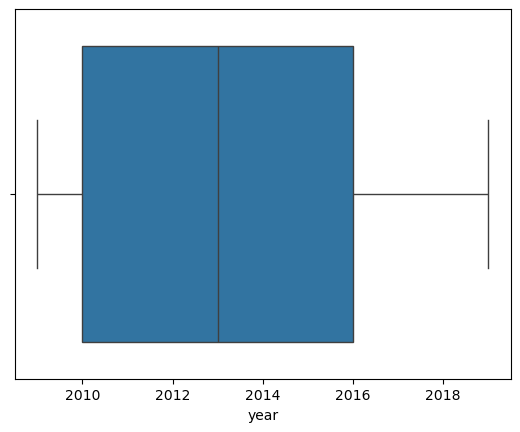

In [14]:
books["year"].min()
books["year"].max()
sns.boxplot(data=books, x="year")
plt.show()

## Validating numerical data
#### We can also view the year data grouped by a categorical variable such as genre by setting the y keyword argument. It looks like the children's books in our dataset have slightly later publishing years in general, but the range of years is the same for all genres.

## Validating numerical data
#### We can also view the year data grouped by a categorical variable such as genre by setting the y keyword argument. It looks like the children's books in our dataset have slightly later publishing years in general, but the range of years is the same for all genres.

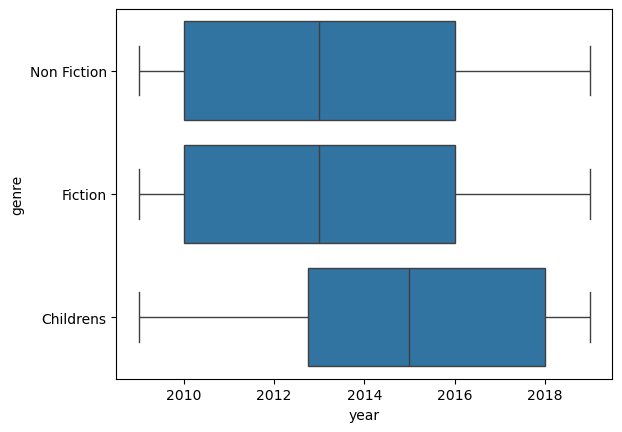

In [15]:
sns.boxplot(data=books, x="year", y="genre")
plt.show()

#### Handling Outliers

   Working_Year                 Designation Experience Employment_Status  \
0          2020              Data Scientist        Mid                FT   
1          2020  Machine Learning Scientist     Senior                FT   
2          2020           Big Data Engineer     Senior                FT   
3          2020        Product Data Analyst        Mid                FT   
4          2020   Machine Learning Engineer     Senior                FT   

  Employee_Location Company_Size  Remote_Working_Ratio  Salary_USD  
0                DE            L                     0     76227.0  
1                JP            S                     0    248257.0  
2                GB            M                    50    104100.0  
3                HN            S                     0     19097.0  
4                US            L                    50    143225.0  
       Working_Year  Remote_Working_Ratio     Salary_USD
count    607.000000             607.00000     607.000000
mean    2021.40

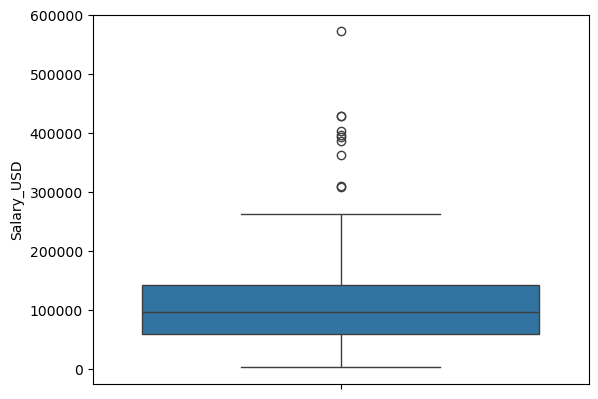

83332.0
-65105.0 268223.0
    Experience Employee_Location  Salary_USD
25   Executive                US    310321.0
33         Mid                US    429675.0
63      Senior                US    393392.0
97         Mid                US    429675.0
157        Mid                US    403895.0
225  Executive                US    397211.0
252  Executive                US    572900.0
482  Executive                US    309366.0
519     Senior                US    362837.0
523     Senior                US    386708.0
       Working_Year  Remote_Working_Ratio     Salary_USD
count    597.000000            597.000000     597.000000
mean    2021.412060             70.686767  102328.480737
std        0.688634             40.797800   55910.790653
min     2020.000000              0.000000    2730.000000
25%     2021.000000             50.000000   59819.000000
50%     2022.000000            100.000000   95483.000000
75%     2022.000000            100.000000  141565.000000
max     2022.000000    

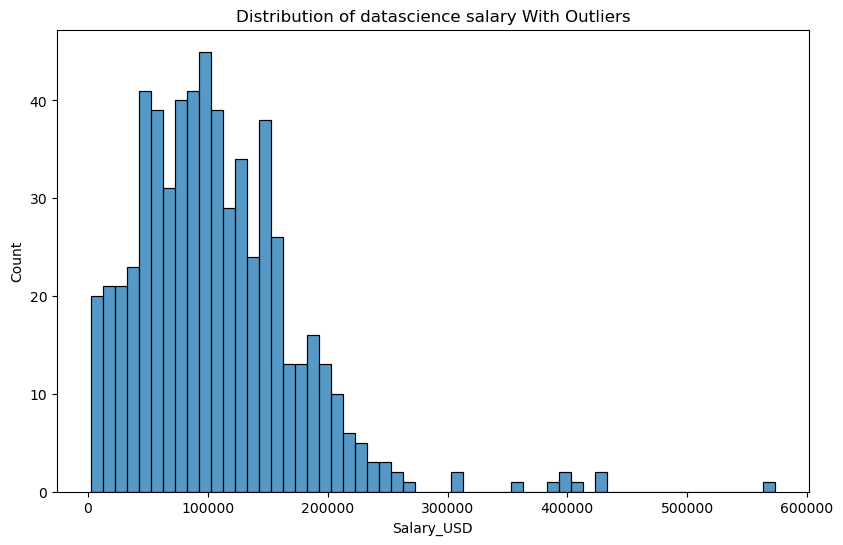

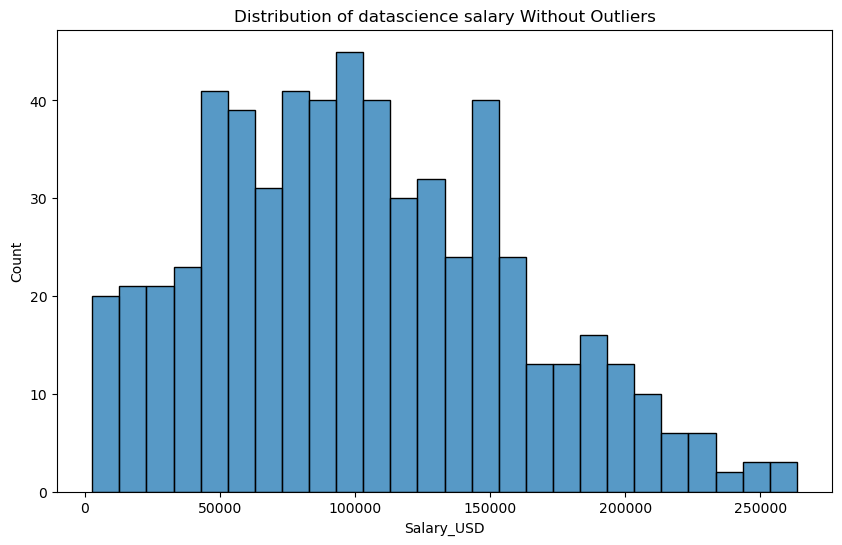

In [16]:
# import dataframe
datascience = pd.read_csv(r"C:\Users\NEW USER\anaconda_projects\ds_salaries_clean.csv")
print(datascience.head())

# Using describe stat function
print(datascience.describe())

# IQR in boxplot
sns.boxplot(data=datascience, y="Salary_USD")
plt.show()

# Identifying thresholds
twenty_fifth = datascience["Salary_USD"].quantile(0.25)
seventy_fifth = datascience["Salary_USD"].quantile(0.75)
salaries_iqr = seventy_fifth - twenty_fifth
print(salaries_iqr)
lower_threshold = twenty_fifth - 1.5 * salaries_iqr
upper_threshold = seventy_fifth + 1.5 * salaries_iqr
print(lower_threshold , upper_threshold)

# Subsetting data with outliers
datascience_with_outliers = datascience[(datascience["Salary_USD"] < lower_threshold) | 
                            (datascience["Salary_USD"] > upper_threshold)]\
                            [["Experience", "Employee_Location", "Salary_USD"]]
print(datascience_with_outliers)

# Subsetting data without outliers
datascience_no_outliers = datascience[(datascience["Salary_USD"] > lower_threshold) & (datascience["Salary_USD"] < upper_threshold)]
print(datascience_no_outliers.describe())

# Distribution with outliers
plt.figure(figsize=(9.7,6))
sns.histplot(data=datascience, binwidth=10000, x="Salary_USD")
plt.title("Distribution of datascience salary With Outliers")
plt.show()

# Distribution without outliers
plt.figure(figsize=(10,6))
sns.histplot(data=datascience_no_outliers, binwidth=10000, x="Salary_USD")
plt.title("Distribution of datascience salary Without Outliers")
plt.show()

##### From the descriptive statistics; the maximum salary is more than four times the mean and median.These Seems extreme.!
##### From the IQR in box plot; the percentiles are included in box plots, like the one showing salaries of data professionals. The box contains percentiles, and observations considered to be outliers are represented as dblack round circles outside of the box.
##### The detection of outliers is an important part of our exploratory data analysis because; These are extreme values and may not accurately represent the data. Additionally, they can skew the mean and standard deviation. If we plan to perform statistical tests or build machine learning models, these will often require data that is normally distributed and not skewed!                  
##### The detection of outliers is an important part of our exploratory data analysis because; These are extreme values and may not accurately represent the data. Additionally, they can skew the mean and standard deviation. If we plan to perform statistical tests or build machine learning models, these will often require data that is normally distributed and not skewed!    

### Histograms, boxplots, and descriptive statistics are also useful methods for identifying extreme values. 

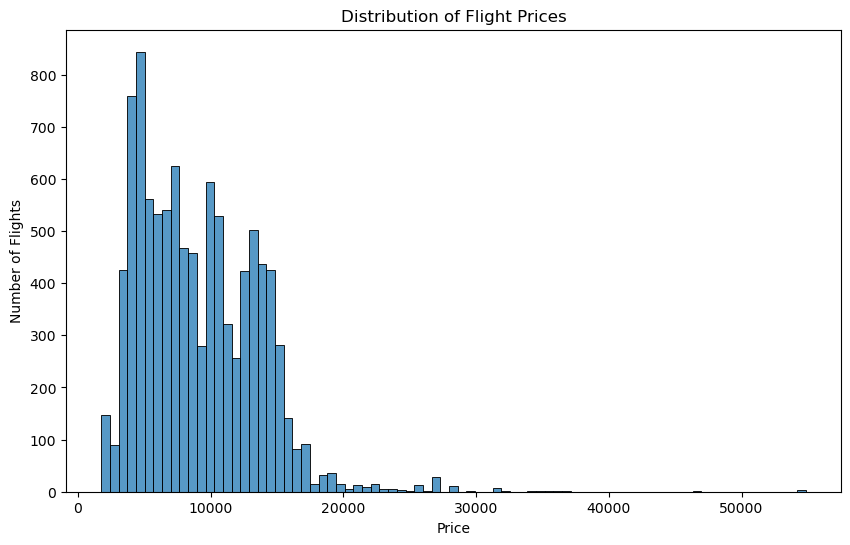

count      10446
unique       367
top       2h 50m
freq         532
Name: Duration, dtype: object
7096.25
count     9959.000000
mean      8875.160860
std       4057.202002
min       1759.000000
25%       5228.000000
50%       8283.000000
75%      12284.000000
max      23001.000000
Name: Price, dtype: float64


In [17]:
# Import dataframe
planes = pd.read_csv(r"C:\Users\NEW USER\anaconda_projects\planes.csv")

# Plot a histogram of flight prices
plt.figure(figsize=(10,6))
sns.histplot(data=planes, x="Price")
plt.title("Distribution of Flight Prices")
plt.xlabel("Price")
plt.ylabel("Number of Flights")
plt.show()

# Display descriptive statistics for flight duration
print(planes["Duration"].describe())

# To remove outliers; calculate the 75th and 25th percentiles
price_seventy_fifth = planes["Price"].quantile(0.75)
price_twenty_fifth = planes["Price"].quantile(0.25)

# Calculate iqr
prices_iqr = price_seventy_fifth - price_twenty_fifth
print(prices_iqr)

# Calculate the thresholds
upper = price_seventy_fifth + (1.5 * prices_iqr)
lower = price_twenty_fifth - (1.5 * prices_iqr)

# Subset the data
planes = planes[(planes["Price"] > lower) & (planes["Price"] < upper)]
print(planes["Price"].describe())

##### Originally the dataset had a maximum price of almost 55000, but the output of planes.describe() shows the maximum has been reduced to around 23000, reflecting a less skewed distribution for analysis!

### DateTime data                                                                                                                 A divorce dataset! The data describes Mexican marriages dissolved between 2000 and 2015. It contains marriage and divorce dates, education level, birthday, income for each partner, and marriage duration, as well as the number of children the couple had at the time of divorce.

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration             int64
num_kids                    float64
dtype: object


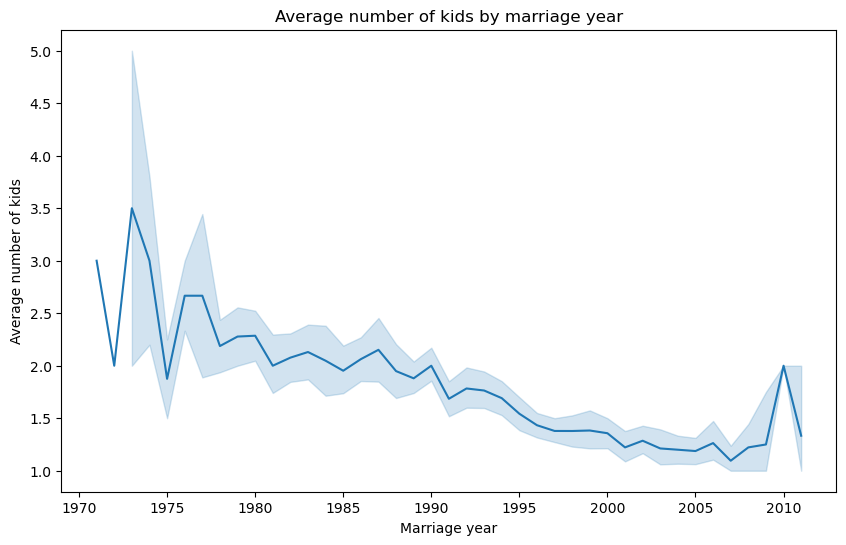

In [18]:
# Import divorce.csv, parsing the appropriate columns as dates in the import
divorce = pd.read_csv(r"C:\Users\NEW USER\anaconda_projects\divorce.csv", parse_dates=["divorce_date","dob_man","dob_woman","marriage_date"])
print(divorce.dtypes)

# Convert the marriage_date column to DateTime values
divorce["marriage_date"] = pd.to_datetime(divorce["marriage_date"])

# Define the marriage_year column
divorce["marriage_year"] = divorce["marriage_date"].dt.year

# Create a line plot showing the average number of kids by year
plt.figure(figsize=(10,6))
sns.lineplot(data=divorce, x="marriage_year", y="num_kids")
plt.title("Average number of kids by marriage year")
plt.xlabel("Marriage year")
plt.ylabel("Average number of kids")
plt.show()

##### it looks like couples who had later marriage years also had fewer children during their marriage

### Correlation: Getting a sense of relationships between variables is important for evaluating how data should be used. Correlation describes the direction of the relationship between two variables as well as its strength. Understanding this relationship can help us use variables to predict future outcomes. A quick way to see the pairwise correlation of numeric columns in a DataFrame is to use pandas' dot-corr method. A negative correlation coefficient indicates that as one variable increases, the other decreases. A value closer to zero is indicative of a weak relationship, while values closer to one or negative one indicate stronger relationships. Note that dot-corr calculates the Pearson correlation coefficient, measuring the linear relationship between two variables.

In [19]:
# import dataframe
divorce = pd.read_csv(r"C:\Users\NEW USER\anaconda_projects\divorce.csv")
print(divorce.head())

# Correlation of numeric columns and using numeric_only to avoid errors from non numeric columns
divorce.corr(numeric_only=True)

  divorce_date     dob_man education_man  income_man  dob_woman  \
0     9/6/2006  12/18/1975     Secondary      2000.0   8/1/1983   
1     1/2/2008  11/17/1976  Professional      6000.0  3/13/1977   
2     1/2/2011    4/6/1969   Preparatory      5000.0  2/16/1970   
3     1/2/2011  11/13/1979     Secondary     12000.0  5/13/1981   
4     1/2/2011   9/20/1982  Professional      6000.0  1/30/1988   

  education_woman  income_woman marriage_date  marriage_duration  num_kids  
0       Secondary        1800.0     6/26/2000                  5       1.0  
1    Professional        6000.0      9/2/2001                  7       NaN  
2    Professional        5000.0      2/2/2000                  2       2.0  
3       Secondary       12000.0     5/13/2006                  2       NaN  
4    Professional       10000.0      8/6/2007                  3       NaN  


,income_man,income_woman,marriage_duration,num_kids
income_man,1.000000,0.318047,0.085321,0.040848
income_woman,0.318047,1.000000,0.078677,-0.018015
marriage_duration,0.085321,0.078677,1.000000,0.447358
num_kids,0.040848,-0.018015,0.447358,1.000000


### Correlation heatmaps Let's wrap our divorce-dot-corr results in a Seaborn heatmap for quick visual interpretation. A heatmap has the benefit of color coding so that strong positive and negative correlations, represented in deep purple and beige respectively, are easier to spot. Setting the annot argument to True labels the correlation coefficient inside each cell. Here, we can see that marriage year and marriage duration are strongly negatively correlated; in our dataset, marriages in later years are typically shorter. 
### Correlation in context: However, this highlights an important point about correlations: we must always interpret them within the context of our data! Since our dataset is about marriages that ended between 2000 to 2015, marriages that started in earlier years will by definition have a longer duration than those that started in later ones.

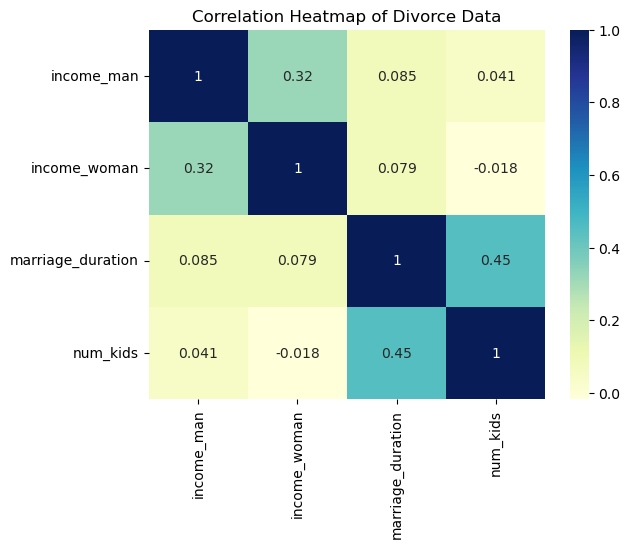

1/10/2008
9/9/2013


In [20]:
sns.heatmap(divorce.corr(numeric_only=True), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap of Divorce Data")
plt.show()

# Correlation in context
print(divorce["divorce_date"].min())
print(divorce["divorce_date"].max())

### Visualizing relationships: We also need to be careful to remember that the Pearson coefficient we've been looking at only describes the linear correlation between variables. Variables can have a strong non-linear relationship and a Pearson correlation coefficient of close to zero. Alternatively, data might have a correlation coefficient indicating a strong linear relationship when another relationship, such as quadratic, is actually a better fit for the data. This is why it's important to complement our correlation calculations with scatter plots!                                                                                 Scatter plots: For example, the monthly income of the female partner and the male partner at the time of divorce showed a correlation coefficient of zero-point-three-two in our heatmap. Let's check that this correctly indicates a small positive relationship between the two variables by passing them as x and y arguments to Seaborn's scatterplot function. It looks like the relationship exists but is not particularly strong, just as our heatmap suggested.

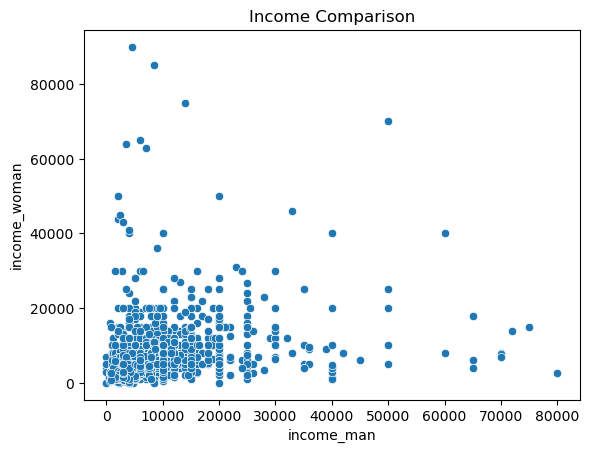

In [21]:
sns.scatterplot(data=divorce, x="income_man", y="income_woman")
plt.title("Income Comparison")
plt.show()

### Pairplots: We can take our scatterplots to the next level with Seaborn's pairplot. When passed a DataFrame, pairplot plots all pairwise relationships between numerical variables in one visualization. On the diagonal from upper left to lower right, we see the distribution of each variable's observations. This is useful for a quick overview of relationships within the dataset. However, having this much information in one visual can be difficult to interpret, especially with big datasets which lead to very small plot labels like the ones we see here.                                                                                      We can limit the number of plotted relationships by setting the vars argument equal to the variables of interest. This visual reassures us that what our correlation coefficients told us was true: variables representing the income of each partner as well as the marriage duration variable all have fairly weak relationships with each other. We also notice in the lower right plot that the distribution of marriage durations includes many shorter marriages and fewer longer marriages.

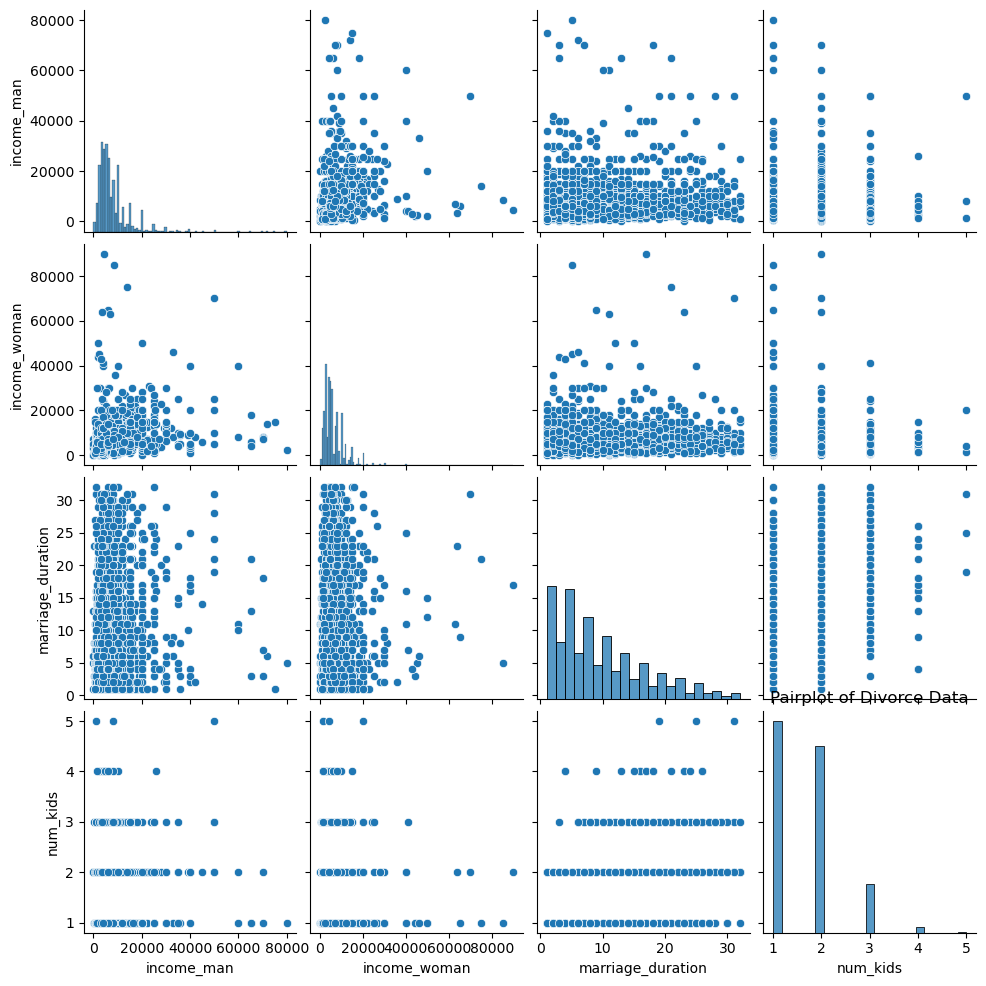

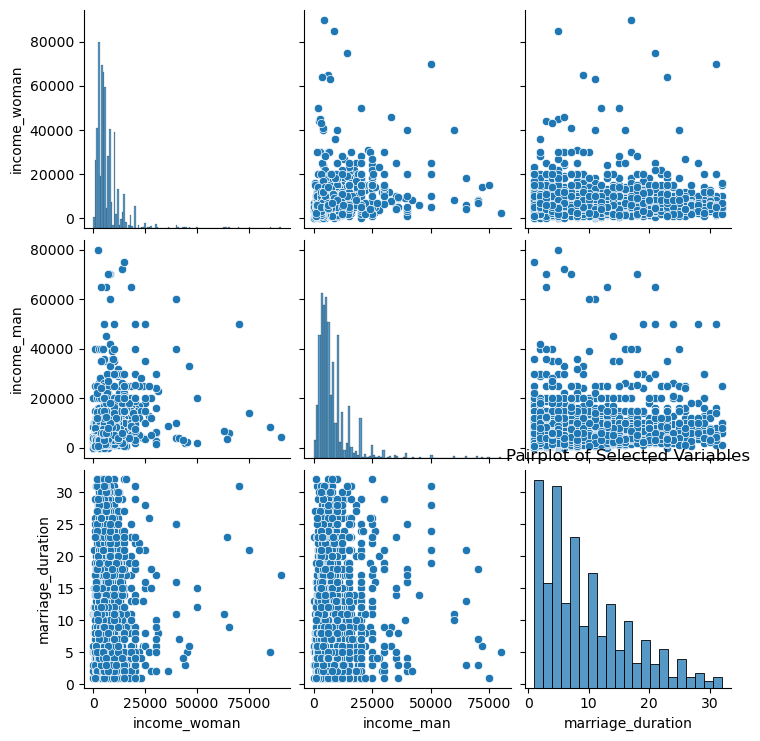

In [22]:
sns.pairplot(data=divorce)
plt.title("Pairplot of Divorce Data")
plt.show()

# limit the number of plotted relationships by setting the vars argument equal to the variables of interest. 
sns.pairplot(data=divorce, vars=["income_woman", "income_man", "marriage_duration"])
plt.title("Pairplot of Selected Variables")
plt.show()

### In the last exercise, you may have noticed that a longer marriage_duration is correlated with having more children, represented by the num_kids column. The correlation coefficient between the marriage_duration and num_kids variables is 0.45.

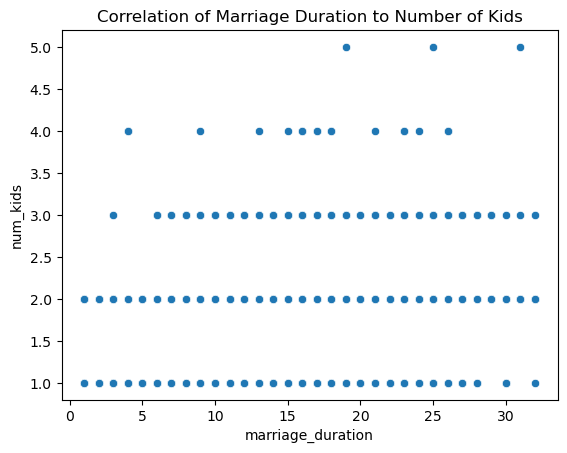

In [23]:
# Create the scatterplot
sns.scatterplot(data=divorce, x="marriage_duration", y="num_kids")
plt.title("Correlation of Marriage Duration to Number of Kids")
plt.show()

### Your task is to use a pairplot to compare the relationship between marriage_duration and income_woman. 

<Figure size 1000x600 with 0 Axes>

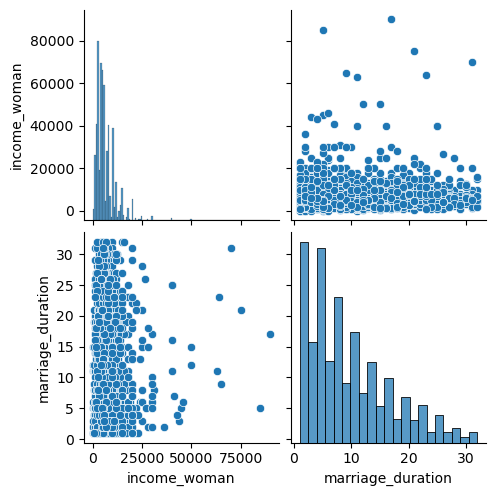

In [24]:
# Create a pairplot for income_woman and marriage_duration
plt.figure(figsize=(10,6))
sns.pairplot(data=divorce, vars=["income_woman" , "marriage_duration"])
plt.show()

### Factor relationships and distributions                                                                                        We previously looked at relationships between numerical variables. Of course, categorical variables, or factors, also have relationships.                                                                                                                Level of education: male partner: We haven't explored the categorical variables related to education level yet. Let's fix that! Checking the value_counts for education_man, we see that most men have an education level between primary and professional, with a few men in the "None" or "Other" categories.



In [25]:
# Level of education male partner
divorce["education_man"].value_counts()
# Level of education

education_man
Professional    1313
Preparatory      501
Secondary        288
Primary          100
Other              3
Name: count, dtype: int64

#### Exploring categorical relationships: Categorical variables are harder to summarize numerically, so we often rely on visualizations to explore their relationships. Perhaps we are interested in the relationship between marriage duration and the education level of the man in the dissolved marriage. We could begin by making a histogram of the distribution of marriage duration and then layer in the information we have on male education level by setting education_man as the hue argument. The resulting histogram reinforces what we saw in value_counts: we have a lot of information on males with professional-level education. However, because the education levels are stacked on top of each other, the relationship between marriage duration and male education level isn't super clear.

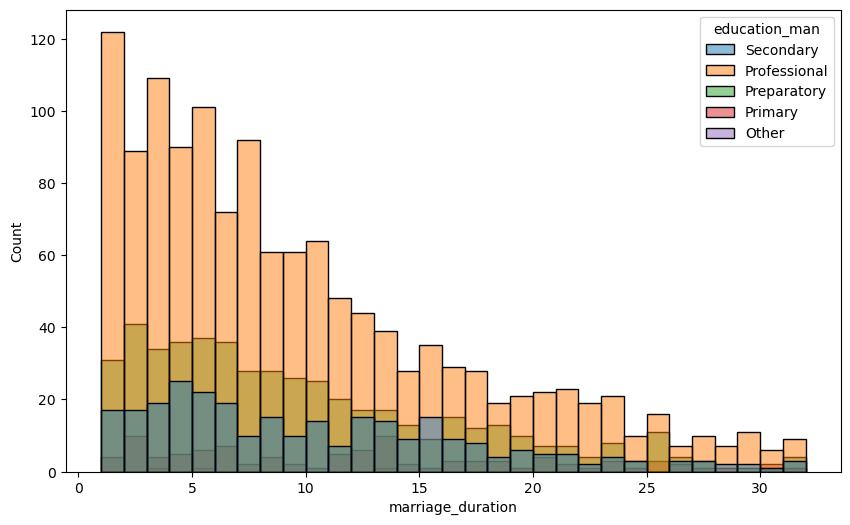

In [26]:
# Exploring categorical relationships
plt.figure(figsize=(10,6))
sns.histplot(data=divorce, x="marriage_duration", hue="education_man", binwidth=1)
plt.show()

### Kernel Density Estimate (KDE) plots: Seaborn's Kernel Density Estimate or KDE plots address this issue. Similar to histograms, KDEs allow us to visualize distributions. KDEs are considered more interpretable, though, especially when multiple distributions are shown as they are here. Notice that the location of the peak marriage duration for each level of the male partner's education is more identifiable in this KDE plot than it was in the histogram. However, due to the smoothing algorithm used in KDE plots, the curve can include values that don't make sense, so it's important to set good smoothing parameters. Here's an example: zooming in on the KDE plot showing the distribution of male education levels, we can see that the distribution seems to suggest that some couples had marriage durations of less than zero. That's impossible!  To fix this, we can use the cut keyword argument. cut tells Seaborn how far past the minimum and maximum data values the curve should go when smoothing is applied. When we set cut equal to zero, the curve will be limited to values between the minimum and maximum x values, here, the minimum and maximum values for marriage duration. The plot now shows only marriage durations greater than or equal to one year, the shortest marriage duration in the dataset.

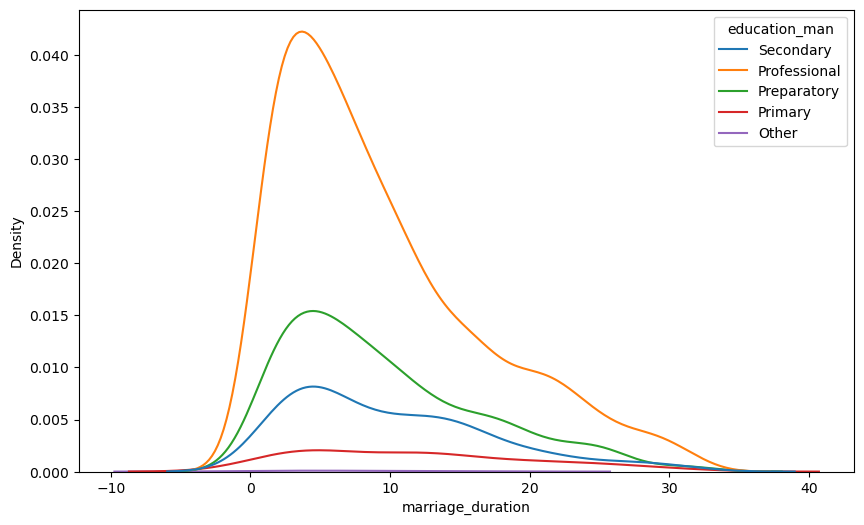

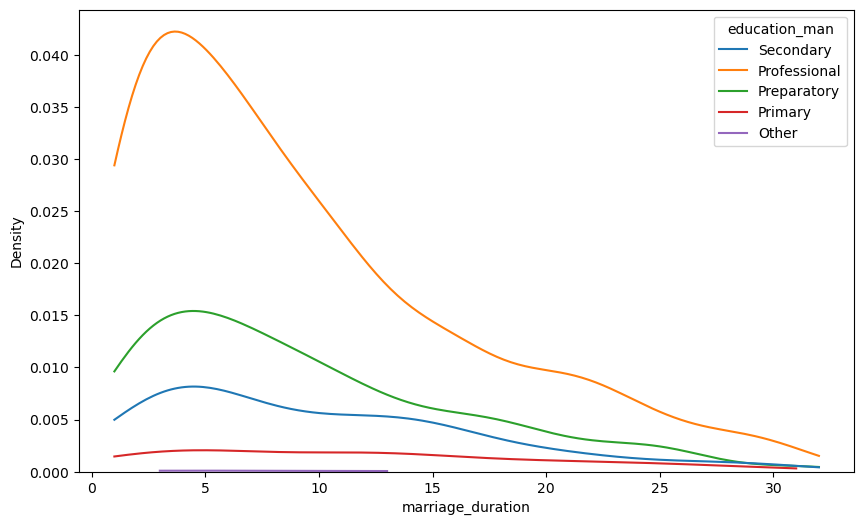

In [27]:
# Kernel Density Plot
plt.figure(figsize=(10,6))
sns.kdeplot(data=divorce, x="marriage_duration", hue="education_man")
plt.show()

# Kernel Density Plot
plt.figure(figsize=(10,6))
sns.kdeplot(data=divorce, x="marriage_duration", hue="education_man", cut=0)
plt.show()

### Cumulative KDE plots: If we're interested in the cumulative distribution function, we can set the cumulative keyword argument to True. This graph describes the probability that marriage duration is less than or equal to the value on the x-axis for each level of male partner education.

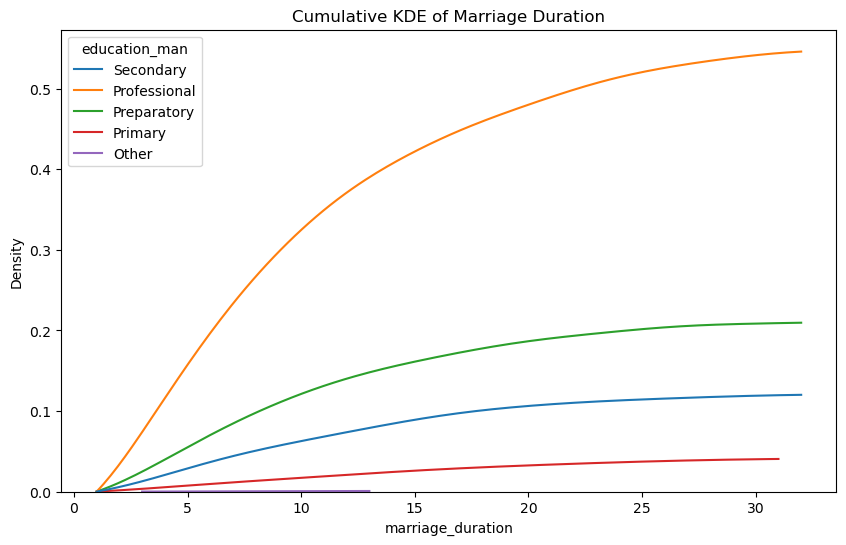

In [28]:
# Cumulative KDE plots
plt.figure(figsize=(10,6))
sns.kdeplot(data=divorce, x="marriage_duration", hue="education_man", cut=0, cumulative=True)
plt.title("Cumulative KDE of Marriage Duration")
plt.show()

### Relationship between marriage age and education: Perhaps we are interested in whether divorced couples who got married when they were older typically have higher levels of education. We can create columns representing the approximate age at marriage for men and women by subtracting each partner's birth year from the marriage year.                                                                                                      Scatter plot with categorical variables: Then, we create a scatterplot using these variables on the x and y-axis. It looks like there is a positive correlation between them! Indeed, the Pearson correlation coefficient is 0.69. But the x and y values in scatter plots must be numerical. How do we introduce education level into our visual?                                                                                                        Scatter plot with categorical variables: Then, we create a scatterplot using these variables on the x and y-axis. It looks like there is a positive correlation between them! Indeed, the Pearson correlation coefficient is 0.69. But the x and y values in scatter plots must be numerical. How do we introduce education level into our visual? One way to do this is to set the hue argument, which assigns a color to each data point based on values in a given column. Here, we set hue equal to education_man. The results suggest that men with a professional education level, represented with orange dots, may tend to get married later.

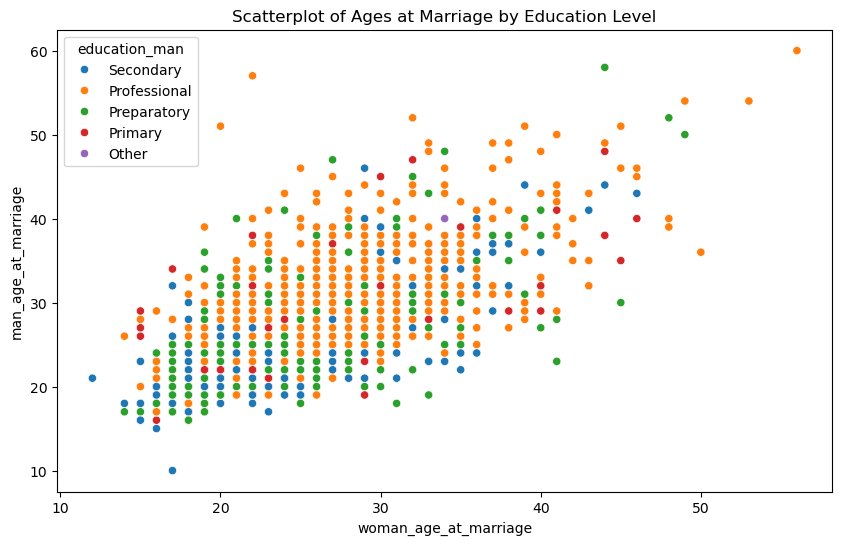

In [35]:
# Convert dob_man and dob_woman to datetime
divorce["dob_man"] = pd.to_datetime(divorce["dob_man"])
divorce["dob_woman"] = pd.to_datetime(divorce["dob_woman"])
divorce["marriage_date"] = pd.to_datetime(divorce["marriage_date"])

# Calculate age at marriage
divorce["man_age_at_marriage"] = divorce["marriage_date"].dt.year - divorce["dob_man"].dt.year
divorce["woman_age_at_marriage"] = divorce["marriage_date"].dt.year - divorce["dob_woman"].dt.year

# Scatter plot with categorical variables
plt.figure(figsize=(10,6))
sns.scatterplot(data=divorce, x="woman_age_at_marriage", y="man_age_at_marriage", hue="education_man")
plt.title("Scatterplot of Ages at Marriage by Education Level")
plt.show()


## Turning Exploratory Analysis into Action: Exploratory data analysis is a crucial step in the data science workflow, but it isn't the end! Now it's time to learn techniques and considerations you can use to successfully move forward with your projects after you've finished exploring!
